In [1]:
from vpython import *
import random
import numpy as np
from matplotlib import pyplot as plt 

<IPython.core.display.Javascript object>

## A. Two-Dimentional Random Walker

#### Confirm Uniformity of Random Number Generation

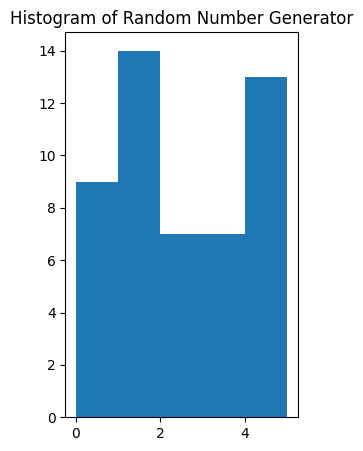

In [3]:
random_list = []

while(len(random_list) < 50):
    random_list.append(random.randrange(6))  # 0 ~ 5
    
fig = plt.figure(figsize =(3, 5))
plt.hist(random_list, bins=[0, 1, 2, 3, 4, 5])
plt.title("Histogram of Random Number Generator")
plt.show()

Since the random function is psuedo-random, you can observe that the occurence of the random number is not actually random and biased. But it can still be used for our purpose of generating random numbers.

#### Simulation

In [26]:
scene = canvas(background=color.white)

##############
step_limit = 500
##############
num_turns = 0

# Directions
direction_x = [1, 0, -1, 0]
direction_y = [0, 1, 0, -1]

endpoint_sum = 0

# To Find the average, run the entire thing 5 times
while(num_turns < 5):
    # Starts at (0,0,0)
    prev_position = vec(0,0,0)
    num_steps = 0
    
    while(num_steps <= step_limit):
        rate(100)
        idx = random.randrange(4) # 0 ~ 3

        # Display cylinder object (Only for the 1st run)
        if (num_turns == 0):
            cylinder(pos=prev_position, axis=vec(direction_x[idx], direction_y[idx], 0), size=vec(1 ,0.3 ,1), color=color.black)

        # Update position of next cylinder
        prev_position.x = prev_position.x + direction_x[idx]
        prev_position.y = prev_position.y + direction_y[idx] 

        num_steps += 1

    # Find the endpoint radius
    endpoint_sum = endpoint_sum + sqrt(pow(prev_position.x, 2) + pow(prev_position.y, 2))
    num_turns += 1
    
print("*************************")
print("Average Expected: Sqrt({}) = {}".format(step_limit, sqrt(step_limit)))
print("Average Endpoint Radius: {}".format(endpoint_sum / 5.0))

<IPython.core.display.Javascript object>

*************************
Average Expected: Sqrt(500) = 22.360679774997898
Average Endpoint Radius: 16.919625439924282


**Comparison:**  
As shown above, the actual average endpoint is far less than the average expected.

## B. 1-D Cellular Automation Simulation

**Chosen Rule:** Rule 126  
I chose this rule because it looks like the triforce symbol from The Legend of Zelda series.  
  
**Stopping Condition:**  
When it's at row_cnt is 0, it stops  
  
NOTE: I don't know why, but after running part A, the rest of the simulation's rate(2) gets messed up somehow. If you run the rest off the simulations multiple times, this eventually goes away and everything runs as expected (You can also just reset and run the rest of the simulation without running part A).

In [36]:
scene1 = canvas(background=color.white)

#############
# 31 col, 16 rows
col = 31
row_cnt = 14   # 16 rows in total (0 - 15), since starting row is predefined, start at idx 14
#############

# array that contains row's cell information. This is used throughout the simulation
check_arr = np.zeros(31)   # 0 = white, 1 = black cell
check_arr[15] = 1          # middle cell = black

# Find pattern of next block using given prev. left, mid, and right cells
def find_next_pattern(left, mid, right):
    # NOTE: Rule 126
    if (left and mid and right) or (left == 0 and mid == 0 and right == 0):
        return 0
    else:
        return 1

# Update check_arr to be the next row's state
def update_check_list():
    arr = np.zeros(31)
    for i in range(31):
        left = check_arr[i - 1] if i != 0 else 0
        mid = check_arr[i]
        right = check_arr[i + 1] if i != 30 else 0
        arr[i] = find_next_pattern(left, mid, right)
    return arr

def display_cells():
    position = vec(0, row_cnt, 0)     # Starting Position
    for cell in check_arr:
        if cell == 0:
            box(pos=position, color=color.white)
        else:
            box(pos=position, color=color.black)
        position = position + vec(1, 0, 0)  # Add 1 to x-axis and update position

while(row_cnt >= 0):
    rate(1)
    check_arr = update_check_list()   # First, update the next row's state, save to check_arr
    display_cells()                   # Display cells using next state's check_arrs
    row_cnt -= 1


<IPython.core.display.Javascript object>

## C. Conway's Game of Life Simulation

In [5]:
'''
 6 7 8
 5 c 1
 4 3 2
'''
dir_x = [1, 1, 0, -1, -1, -1, 0, 1]
dir_y = [0, 1, 1, 1, 0, -1, -1, -1]

# Update the next state of cell array (assume n x n array)
def update_cell_arr(n):
    # temporary array
    arr = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            cnt = 0
            state = cell_arr[i][j]
            
            for k in range(8):
                # check out-of-bound case
                nx = i + dir_x[k]
                ny = j + dir_y[k]
                if nx < 0 or ny < 0 or nx >= n or ny >= n:
                    continue
                if cell_arr[nx][ny] == 1:
                    cnt += 1
                    
            # if current cell is alive
            if state == 1 and (cnt == 2 or cnt == 3):
                arr[i][j] = 1
            # if current cell is dead
            elif state == 0 and cnt == 3:
                arr[i][j] = 1
            else:
                arr[i][j] = 0
                
    return arr
                
def draw_cell(n):
    position = vec(0, 0, 0)
    for i in range(n):
        for j in range(n):
            if cell_arr[i][j] == 1:
                box(pos=position, color=color.black)
            else:
                box(pos=position, color=color.white)
            position = vec(i, j, 0)


### Testing A Simple Demo

In [35]:
scene2 = canvas(background = color.white)

##############
n = 11
##############

iteration = 0
cell_arr = np.zeros((n, n))

# initial state
cell_arr[4][5] = 1
cell_arr[5][5] = 1
cell_arr[6][5] = 1
cell_arr[5][4] = 1
cell_arr[5][6] = 1

while (iteration < 10):
    rate(2)
    draw_cell(n)
    cell_arr = update_cell_arr(n)
    iteration += 1

<IPython.core.display.Javascript object>

### Still Lifes (Block, Bee Hive, Boat, Tub)

In [28]:
scene3 = canvas(background = color.white)

##############
n = 11
##############

iteration = 0
cell_arr = np.zeros((n, n))

# Block
cell_arr[7][2] = 1
cell_arr[7][3] = 1
cell_arr[8][2] = 1
cell_arr[8][3] = 1

# Bee Hive
cell_arr[1][4] = 1
cell_arr[2][3] = 1
cell_arr[3][3] = 1
cell_arr[2][5] = 1
cell_arr[3][5] = 1
cell_arr[4][4] = 1

# Tub
cell_arr[5][7] = 1
cell_arr[6][6] = 1
cell_arr[7][7] = 1
cell_arr[6][8] = 1

while (iteration < 10):
    rate(2)
    draw_cell(n)
    cell_arr = update_cell_arr(n)
    iteration += 1

<IPython.core.display.Javascript object>

#### Oscillators

In [14]:
scene4 = canvas(background = color.white)

##############
n = 11
##############

iteration = 0
cell_arr = np.zeros((n, n))

# Blinker
cell_arr[1][3] = 1
cell_arr[2][3] = 1
cell_arr[3][3] = 1

# Beacon
cell_arr[8][2] = 1
cell_arr[9][2] = 1
cell_arr[9][3] = 1
cell_arr[6][4] = 1
cell_arr[6][5] = 1
cell_arr[7][5] = 1

while (iteration < 5):
    rate(2)
    draw_cell(n)
    cell_arr = update_cell_arr(n)
    iteration += 1

<IPython.core.display.Javascript object>

#### Spaceships

In [15]:
scene5 = canvas(background = color.white)

##############
n = 14
##############

iteration = 0
cell_arr = np.zeros((n, n))

# Glider (only made 1)
cell_arr[1][9] = 1
cell_arr[2][8] = 1
cell_arr[3][8] = 1
cell_arr[1][7] = 1
cell_arr[2][7] = 1

while (iteration < 15):
    rate(4)
    draw_cell(n)
    cell_arr = update_cell_arr(n)
    iteration += 1

<IPython.core.display.Javascript object>

**Verification Process:**  
To verify that the simulation is working properly, I ran a demo(of some random pattern that I've found), still lifes, oscillators, and spaceships. As expected, they all work the same as how they're supposed to work according to Wikipedia, and from this, I can confirm that the simulation is valid.

## Conway's Game of Life Simulation w/ Async Updating

**Selected Scheme**: random independent scheme  

To implement the random independent scheme, I had to change the way cell_arr updates because now you do not want to go through all the cells to update them all. Instead, I made a watch_list that keeps all the cells that are alive and the dead cells that are adjacent. By doing so, I can simply get the length of the watch_list, pick a random index, acquire the x and y of the cell at that index, and update on that particular cell. Therefore, for every iteration (cycle), I can update a single random cell at a time. 

#### Still Lives

In [18]:
# Update the next state of given cell (for async)
def update_cell_arr_async(n, cell):
    # temporary array
    arr = cell_arr
    i, j = cell
    cnt = 0
    state = cell_arr[i][j]
            
    for k in range(8):
        # check out-of-bound case
        nx = i + dir_x[k]
        ny = j + dir_y[k]
        if nx < 0 or ny < 0 or nx >= n or ny >= n:
            continue
        if cell_arr[nx][ny] == 1:
            cnt += 1
                    
    # if current cell is alive
    if state == 1 and (cnt == 2 or cnt == 3):
        arr[i][j] = 1
    # if current cell is dead
    elif state == 0 and cnt == 3:
        arr[i][j] = 1
    else:
        arr[i][j] = 0
                
    return arr

def update_watch_list(n):
    temp_watch_list = []
    for i in range(n):
        for j in range(n):
            if cell_arr[i][j] == 1:
                if (i, j) not in temp_watch_list:
                    temp_watch_list.append((i, j))
                for k in range(8):
                    nx = i + dir_x[k]
                    ny = j + dir_y[k]
                    if nx < 0 or ny < 0 or nx >= n or ny >= n:
                        continue
                    if (nx, ny) not in temp_watch_list:
                        temp_watch_list.append((nx, ny))
                        
    return temp_watch_list

In [19]:
scene6 = canvas(background = color.white)

##############
n = 11
##############

iteration = 0
cell_arr = np.zeros((n, n))

# Bee Hive
cell_arr[7][2] = 1
cell_arr[7][3] = 1
cell_arr[8][2] = 1
cell_arr[8][3] = 1

# Make watch list to keep the cells that we can "possibly" update
# Since we're selecting cells at random, we must know what cells we can update to see changes in the screen
watch_list = []
watch_list = update_watch_list(n)

while (iteration < 5):
    rate(2)
    draw_cell(n)
    watch_list = update_watch_list(n)
    if (len(watch_list)) == 0:
        break
    idx = random.randrange(len(watch_list))                # Pick random cell's idx from watch_list's size
    cell_arr = update_cell_arr_async(n, watch_list[idx])   # Give random cell to update
    iteration += 1

<IPython.core.display.Javascript object>

#### Oscillators

In [24]:
scene7 = canvas(background = color.white)

##############
n = 11
##############

iteration = 0
cell_arr = np.zeros((n, n))

# Blinker
cell_arr[1][3] = 1
cell_arr[2][3] = 1
cell_arr[3][3] = 1

watch_list = []
watch_list = update_watch_list(n)

while (iteration < 20):
    rate(2)
    draw_cell(n)
    watch_list = update_watch_list(n)
    if (len(watch_list)) == 0:
        break
    idx = random.randrange(len(watch_list))                # Pick random cell's idx from watch_list's size
    cell_arr = update_cell_arr_async(n, watch_list[idx])   # Give random cell to update
    iteration += 1

<IPython.core.display.Javascript object>

#### Spaceships

In [22]:
scene7 = canvas(background = color.white)

##############
n = 14
##############

iteration = 0
cell_arr = np.zeros((n, n))

# Glider (only made 1)
cell_arr[2][9] = 1
cell_arr[3][8] = 1
cell_arr[4][8] = 1
cell_arr[2][7] = 1
cell_arr[3][7] = 1

watch_list = []
watch_list = update_watch_list(n)

while (iteration < 15):
    rate(2)
    draw_cell(n)
    watch_list = update_watch_list(n)
    if (len(watch_list)) == 0:
        break
    idx = random.randrange(len(watch_list))                # Pick random cell's idx from watch_list's size
    cell_arr = update_cell_arr_async(n, watch_list[idx])   # Give random cell to update
    iteration += 1

<IPython.core.display.Javascript object>

### Comparison between Async. vs Sync. Updating

**Still Lifes:**  
There's no significant difference between the Game of Life with sync. and async. updating. 

**Oscillators:**  
The difference starts to appear. From sync. updating, the oscillator that I used (blinker) updates and changes the form as expected. However, in async. updating, the blinker doesn't show any behavior of oscillators but instead, it either completely disappears, or multiplies in number, which is something that we couldn't see from the simulation with sync. updating. 

**Spaceships:**  
Similar to oscillators, in the simulation with sync. updating, the spaceships move across the screen over time. However, the simulation with async. updating doesn't move but instead, changes its form, which is completely different from what it was doing.

